# Research Assignment 5 


[Carmen Salazar]

[working title of the project] 

[04/01/2020]

In [3]:
*cd "/Users/karminsalazar/Desktop/Masters Thesis"

*set more off

*capture log close

*log using research_assignment5log20200405.log

In [27]:
*use ipumsblack50, clear
describe


Contains data from ipumsblack50.dta
  obs:        27,319                          
 vars:            30                          18 Mar 2020 14:57
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
year            int     %8.0g      YEAR       census year
statefip        byte    %8.0g      STATEFIP   state (fips code)
countyfip       int     %8.0g                 county (fips code)
city            int     %8.0g      CITY       city


In [10]:
tab empstat


 employment status |
 [general version] |      Freq.     Percent        Cum.
-------------------+-----------------------------------
               n/a |      4,877       17.85       17.85
          employed |     11,808       43.22       61.07
        unemployed |      1,258        4.60       65.68
not in labor force |      9,376       34.32      100.00
-------------------+-----------------------------------
             Total |     27,319      100.00


### 1. Develop hypotheses that approach a nominal variable in your dataset as a dependent variable (DV). [1 pt]

* If your nominal variable has more than two categorical variables, such as political party affiliation categories of -- Democrat, Democratic Socialist, Green, Independent, or Republican -- develop hypotheses that treat being or not being in at least one of the categories as a dichotomous binomial dependent variable (DV).

* Even if you are not interested in any categorical outcomes for your research project, still develop an hypothesis for at least one nominal variable in your data as a dependent variable. Thinking about potential influences on that variable could help you see if there are intervening relationships or omitted variable biases in your primary outcome of interest.

Do the following when you write your hypothesis:

    A. Write a separate hypothesis for each dependent variable (DV) you want to analyze.
    
My dependent nominal variable of interest is (employment status), more specifically whether one is or is not employed. I hypothesize that being or not employed will be influenced by the years of education obtained by the respondent, where respondents who are employed have obtained a higher number of educational years than respondents who are not employed. 
    
    B. For each dependent variable (DV) state the predicted direction of association between your dependent variable DV and independent variables (IVs) in your model. You can predict no relationship if you do not expect a relationship.
    
I predict a positive direction of association between my dependent variable (employment status) and independent variable (years of education) in my model. This means that as the respondents years of education increases, the employment status of the respondent as employed will increase. I believe there appears to be a relationship between both variables.
 
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
    
From prior knowledge and research, I know that there is a connection between wage achievement in the labor market and education levels. Edcuation is important to our society because of its immediate positive impacts on wages and re-entry into the labor market. Though being unemployed can have negative impacts on wages, these effects can be mitigated with higher levels of education. When attempting to re-enter the labor market, having a higher eduction presents an opportunity to better wages when entering a new position but also allows a person to most likely find a job faster than someone who does not have many years of education. 

In [20]:
gen unemployed= empstat==0 
gen employed= empstat==1

*Created new dummy vraibles where employed that is equal when employment status is equal to 1, otherwise set to 0


### 2. Test your hypotheses [3 pts]

    A. Create a frequency table for your dependent variable (DV).

    B. Estimate an OLS model regressing your dichotomous dependent variable (DV) on your hypothesized independent variables (IVs) and store the results. to see how it compares to when you run an MLE model
    
    C. Estimate an MLE logistic model regressing your dichotomous dependent variable (DV) on your hypothesized independent variables (IVs) and store the results.
    
    D. Use esttab to output the coefficients for your OLS and MLE logistic models with html formatting within your Jupyter Notebook.
    
    E. Use esttab to reoutput your coefficients as odd ratios.

In [25]:
tab employed


   employed |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |     15,511       56.78       56.78
          1 |     11,808       43.22      100.00
------------+-----------------------------------
      Total |     27,319      100.00


In [26]:
display "OR = p / (1-p) = " .4322 / (1-.4322)
display "OR = (fy=1 / fy=0) = " 11808 / 15511


OR = p / (1-p) = .76118352

OR = (fy=1 / fy=0) = .7612662


In [30]:
est clear 
eststo: reg employed educ




      Source |       SS           df       MS      Number of obs   =    27,319
-------------+----------------------------------   F(1, 27317)     =   6794.73
       Model |  1335.42652         1  1335.42652   Prob > F        =    0.0000
    Residual |  5368.84113    27,317  .196538461   R-squared       =    0.1992
-------------+----------------------------------   Adj R-squared   =    0.1992
       Total |  6704.26765    27,318  .245415757   Root MSE        =    .44333

------------------------------------------------------------------------------
    employed |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .0708601   .0008596    82.43   0.000     .0691752     .072545
       _cons |   .0187979   .0056877     3.31   0.001     .0076498     .029946
------------------------------------------------------------------------------
(est1 stored)


In [31]:
%set graph_format svg

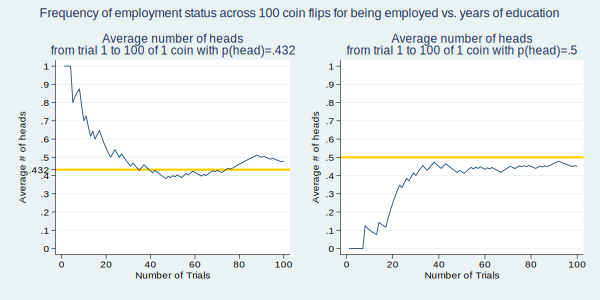

In [32]:
quietly net install heads, from(https://stats.idre.ucla.edu/stat/stata/ado/teach)
quietly heads, flips(100) prob(.432)
quietly graph save employed, replace
quietly heads, flips(100) prob(.50)
quietly graph save educ, replace
graph combine employed.gph educ.gph, ysize(6) xsize(12) iscale(.95) ///
title("Frequency of employment status across 100 coin flips for being employed vs. years of education", size(medlarge))

In [37]:
est clear

quietly eststo: regress employed educ
quietly eststo: logit employed educ 

In [67]:
%html

esttab, cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) html ///
mlabels("OLS" "MLE / logistic") title("Output Coefficients") ///

This front-end or document format cannot display HTML

In [74]:
%html

esttab, cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
legend starlevels(^ .1 * .05 ** .01 *** .001) html ///
mlabels("OLS" "MLE / logistic") title("Odds Ratios") ///
keep(educ) eform

This front-end or document format cannot display HTML

### 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. How would you interpret the relationship between your dependent variable(s) (DVs) and independent variables (IVs) based on the odds ratios for you MLE logistic model?

In this model, the odds ratios represent the constant effect of a predictor X (years of education), on the likelihood that one outcome will occur. We want a measure of the unique effect of each X (years of education) on Y (employment status). OLS and MLE yield quite different estimates for employment status (being or not being employed). Because the model  model above is predicting whether or not somebody is employed or not based on the years of education obtained, the coefficients above present a positive relationship between my dependent and independent variable where all else being equal, respondents with higher years of education were more likely to be employed than those with less years of education.


    B. Do the overall estimates support or contradict your hypotheses? Why?

The overall estimates support my hypothesis. Because the coefficients in my model are positive, they predict the "likelihood" of Y=1 rather than the value of Y for each observation. We can see the odds ratio of 1.43 present the probability that Y=1 is true. 
    
    C. Is there anything suprising in your model estimates? Why?
    
What is surprising is the change in coefficients in both models. Though both are used to estimate the parameters of a linear regression model, OLS is a distance-minimizing approximation/estimation method, while MLE is a "likelihood" maximization method. 

    D. How do the OLS coefficients and their standard errors compare to the MLE estimates? Are the coefficients and standard errors larger or smaller?
    
OLS coefficients and their standard errors compare to the MLE estimates where the coefficients are different in both models. In the first model OLS model regression, the coefficient for OLS is 0.07 and for MLE/Logistic is 0.36. In the second MLE logistic model regression, the coefficient for OLS is 1.07 and for MLE/logistic is 1.43. The standard errors however, in both models stayed the same at (0.00) for OLS and (0.01) for MLE/logistic.